## Import Details and Read Data

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 

df = pd.read_csv('Data/cleaned_cc_data.csv')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Data Preparation

In [32]:
# Reformat data of the independent variable X as a single-column array
X = df["AGE"].values.reshape(-1, 1)

# Display sample data
X[:5]

array([[24],
       [26],
       [34],
       [37],
       [57]])

In [33]:
# The shape of x is 29,601 samples, with a single feature
X.shape

(29601, 1)

In [34]:
# Create an array for the dependent variable y
y = df["LIMIT_BAL"].values

y[:5]

array([ 20000., 120000.,  90000.,  50000.,  50000.])

## Building the Linear Regression Model

In [35]:
# Create a Model with skikit-learn
model = LinearRegression()

In [36]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [37]:
# Display the slope
print(f"Model's slope: {model.coef_[0]}")

Model's slope: 2034.0074559938453


In [38]:
# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: 95416.35772124013


In [39]:
# Display the model's best fit line formula 
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's formula: y = 95416.35772124013 + 2034.0074559938453X


In [ ]:
# Display the formula to predict the salary for a person with 7 years of experience

In [40]:
# Make predictions using the X set 
predictione_y_values= model.predict(X)

In [42]:
# Create a copy of the original data
df_predicted = df.copy()

# Add a column with the predicted salary values
df_predicted["Predicted Balance"] = predictione_y_values

# Display sample data
df_predicted.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Predicted Balance
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,144232.536665
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,148300.551577
2,90000.0,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,164572.611225
3,50000.0,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,170674.633593
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,211354.782713


Text(0, 0.5, 'Predicted Balance')

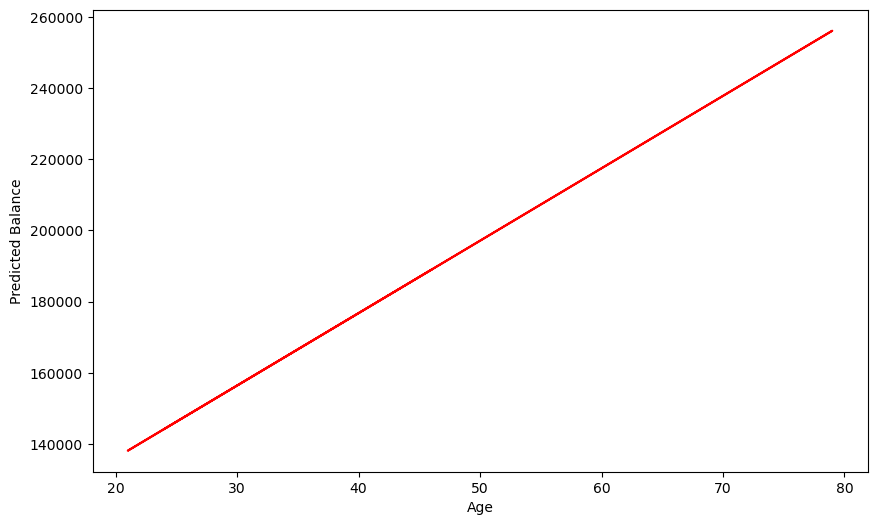

In [51]:
# Create a line plot of the predicted balance values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_predicted["AGE"], df_predicted["Predicted Balance"], c='r', label='Predicted Balance')

# Add Labels
plt.xlabel("Age")
plt.ylabel("Predicted Balance")

# add scatter plot of the actual data


<Axes: title={'center': 'Expected Balance vs. Age'}, xlabel='AGE', ylabel='LIMIT_BAL'>

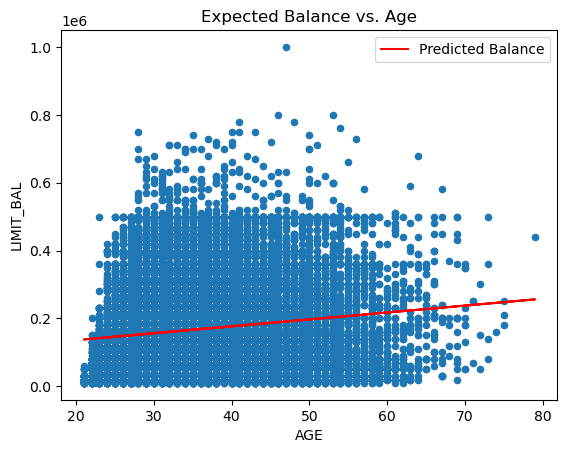

In [61]:
#plot predicted balance scatter and best fit line together
balance_plot = df_predicted.plot.scatter(
    x="AGE", 
    y="LIMIT_BAL", 
    title ='Expected Balance vs. Age',)

# Create a line plot of the predicted balance values
best_fit_line = df_predicted.plot.line(
    x="AGE", 
    y="Predicted Balance", 
    c='r', 
    ax=balance_plot)

balance_plot